In [1]:
from __future__ import annotations
import numpy as np
#from scipy.stats import norm

from tqdm import trange
from tqdm import tqdm
from time import sleep
#from tqdm.notebook import tqdm_notebook
#from rich.progress import Progress
#from rich.progress import track
from IPython.display import Image

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-v0_8-pastel')

In [4]:
import sys
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/workspaces/Jupyter_Dockerbook/')

import pygra.G_body as pg
from pygra.G_evolution import *
from pygra.G_solver import *

In [5]:
run_name = "10"

In [6]:
dist = 3.086 * 10**10
eccentricity = 0.8
m1 = 50.
m2 = 100.

a = pg.G_body(np.array([[m1]]), np.array([[dist/(1 + eccentricity)/(1 + m1/m2), 0., 0.]]), np.array([[0., 1., 0.]]))
b = pg.G_body(np.array([[m2]]), np.array([[-dist/(1 + eccentricity)/(1 + m2/m1), 0., 0.]]), np.array([[0., -1., 0.]]))

v1, v2 = pg.get_Vel_orb(a, b, np.float64(eccentricity))

a.vel = a.vel * v1
b.vel = b.vel * v2

c = a + b
N = 5000
dt = np.float64(1. * 10**6)
time_eval = np.linspace(0, N * dt, N + 1, dtype = np.float64)
__n = 2
pos = c.pos
vel = c.vel
mass = c.mass
pg.get_Period_orb(a, b, float(dt), eccentricity)

Debug: Orbit parameters is sm_axis = 9.52e+09
Eccetricity = 0.8


1310.359934824546

In [7]:
#N=100000
G, softening = a.get_G(), a.get_softening()
G, softening

(132446351931.33047, 100000000.0)

In [8]:
c = a + b
print("Potential energy for a and b is ", -c.get_PE(softening), " Kinetic enegy is ", c.get_KE())

Potential energy for a and b is  [-38625.95239167 -38625.95239167]  Kinetic enegy is  [2575.10729614 1287.55364807]


In [9]:
Double_system = G_evolution(c, time_eval , f"../output/__run_{run_name}/")

Debug: Directory created successfully! (path is ../output/__run_10/)


In [10]:
Double_system.debug_print()

Debug print
My properties is:
positions:  [[ 1.14296296e+10  0.00000000e+00  0.00000000e+00]
 [-5.71481481e+09  0.00000000e+00  0.00000000e+00]]
velocities:  [[ 0.         10.14910301  0.        ]
 [ 0.         -5.0745515   0.        ]]
mass:  [[ 50.]
 [100.]]
evolution moments is [0.000e+00 1.000e+06 2.000e+06 ... 4.998e+09 4.999e+09 5.000e+09]
N_time 5001
file name and path is ../output/__run_10/gsim_00000yr.h5


# Custom
## Euler

In [11]:
pos_save, __vel_save = g_solver_nbe(mass, pos, vel, time_eval, G, softening)
Double_system.solve('Euler')
mass_save, pos_save_s, __vel_save_s, time_save1 = get_data(Double_system.get_file()[0]+'/'+Double_system.get_file()[1])
assert np.array_equal(pos_save, pos_save_s), "pos_save and positions from solve are not equal"


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

Debug: Data saved in ../output/__run_10//gsim_00000yr.h5 successfully


In [12]:
Double_system.debug_print()

Debug print
My properties is:
positions:  [[ 1.14296296e+10  0.00000000e+00  0.00000000e+00]
 [-5.71481481e+09  0.00000000e+00  0.00000000e+00]]
velocities:  [[ 0.         10.14910301  0.        ]
 [ 0.         -5.0745515   0.        ]]
mass:  [[ 50.]
 [100.]]
evolution moments is [0.000e+00 1.000e+06 2.000e+06 ... 4.998e+09 4.999e+09 5.000e+09]
N_time 5001
file name and path is ../output/__run_10/gsim_00000yr.h5


## RK4

In [13]:
pos_save, __vel_save = g_solver_nbrk(mass, pos, vel, time_eval, G, softening)
Double_system.solve('RK4')
mass_save, pos_save_rk, __vel_save_rk, time_save2 = get_data(Double_system.get_file()[0]+'/'+Double_system.get_file()[1])
assert np.array_equal(pos_save, pos_save_rk), "pos_save and positions from solve are not equal"

100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

Debug: Data saved in ../output/__run_10//gsim_00000yr.h5 successfully


In [14]:
Double_system.debug_print()

Debug print
My properties is:
positions:  [[ 1.14296296e+10  0.00000000e+00  0.00000000e+00]
 [-5.71481481e+09  0.00000000e+00  0.00000000e+00]]
velocities:  [[ 0.         10.14910301  0.        ]
 [ 0.         -5.0745515   0.        ]]
mass:  [[ 50.]
 [100.]]
evolution moments is [0.000e+00 1.000e+06 2.000e+06 ... 4.998e+09 4.999e+09 5.000e+09]
N_time 5001
file name and path is ../output/__run_10/gsim_00000yr.h5


# Numba lsoda

In [15]:
pos_save, __vel_save = g_solver_nbl('dop853', mass, pos, vel , time_eval, G, softening, 1.e-12, 1.e-12)
Double_system.solve('numbalsoda','dop853', 1.e-12, 1.e-12)
mass_save, usol2_p, usol2_v, time_save3 = get_data(Double_system.get_file()[0]+'/'+Double_system.get_file()[1])
assert np.array_equal(pos_save, usol2_p), "pos_save and positions from solve are not equal"

100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

Debug: Data saved in ../output/__run_10//gsim_00000yr.h5 successfully


In [16]:
pos_save, __vel_save = g_solver_nbl('lsoda', mass, pos, vel , time_eval, G, softening, 1.e-12, 1.e-12)
Double_system.solve('numbalsoda','lsoda', 1.e-12, 1.e-12)
mass_save, usol_p, usol_v, time_save4 = get_data(Double_system.get_file()[0]+'/'+Double_system.get_file()[1])
assert np.array_equal(pos_save, usol_p), "pos_save and positions from solve are not equal"

100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Debug: Data saved in ../output/__run_10//gsim_00000yr.h5 successfully


In [17]:
Double_system.debug_print()

Debug print
My properties is:
positions:  [[ 1.14296296e+10  0.00000000e+00  0.00000000e+00]
 [-5.71481481e+09  0.00000000e+00  0.00000000e+00]]
velocities:  [[ 0.         10.14910301  0.        ]
 [ 0.         -5.0745515   0.        ]]
mass:  [[ 50.]
 [100.]]
evolution moments is [0.000e+00 1.000e+06 2.000e+06 ... 4.998e+09 4.999e+09 5.000e+09]
N_time 5001
file name and path is ../output/__run_10/gsim_00000yr.h5


# Scipy

In [18]:
sol_lsoda = g_solver_scp('LSODA', mass, pos, vel, time_eval, dt, G, softening, 5e-14, 5e-14) 

Double_system.solve('scipy','LSODA',5e-14,5e-14)
mass_save, pos_scl, __vel_scl, time_save5 = get_data(Double_system.get_file()[0]+'/'+Double_system.get_file()[1])
assert np.array_equal(pos_scl, (sol_lsoda.y[3 * 2:]).T.reshape((len(time_save5), 2, 3))), "sol_* and positions from solve are not equal"

100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

Debug: Data saved in ../output/__run_10//gsim_00000yr.h5 successfully


In [19]:
Double_system.debug_print()

Debug print
My properties is:
positions:  [[ 1.14296296e+10  0.00000000e+00  0.00000000e+00]
 [-5.71481481e+09  0.00000000e+00  0.00000000e+00]]
velocities:  [[ 0.         10.14910301  0.        ]
 [ 0.         -5.0745515   0.        ]]
mass:  [[ 50.]
 [100.]]
evolution moments is [0.000e+00 1.000e+06 2.000e+06 ... 4.998e+09 4.999e+09 5.000e+09]
N_time 5001
file name and path is ../output/__run_10/gsim_00000yr.h5


In [20]:
sol_dop = g_solver_scp('DOP853', mass, pos, vel, time_eval, dt, G, softening, 5e-14, 5e-14) 

Double_system.set_time_range(time_eval)
Double_system.solve('scipy','DOP853', 5e-14, 5e-14)
mass_save, pos_scd, __vel_scd, time_save6 = get_data(Double_system.get_file()[0]+'/'+Double_system.get_file()[1])
assert np.array_equal(pos_scd, (sol_dop.y[3 * 2:]).T.reshape((len(time_save6), 2, 3))), "sol_* and positions from solve are not equal"

100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

Debug: Data saved in ../output/__run_10//gsim_00000yr.h5 successfully


In [21]:
Double_system.debug_print()

Debug print
My properties is:
positions:  [[ 1.14296296e+10  0.00000000e+00  0.00000000e+00]
 [-5.71481481e+09  0.00000000e+00  0.00000000e+00]]
velocities:  [[ 0.         10.14910301  0.        ]
 [ 0.         -5.0745515   0.        ]]
mass:  [[ 50.]
 [100.]]
evolution moments is [0.000e+00 1.000e+06 2.000e+06 ... 4.998e+09 4.999e+09 5.000e+09]
N_time 5001
file name and path is ../output/__run_10/gsim_00000yr.h5


# Compare results

In [22]:
pos_save.shape, pos_save_rk.shape, usol_p.shape, usol2_p.shape, pos_scl.shape, pos_scd.shape,  # sol_lsoda.y.shape,sol_dop.y.shape

((5001, 2, 3),
 (5001, 2, 3),
 (5001, 2, 3),
 (5001, 2, 3),
 (14796, 2, 3),
 (5021, 2, 3))

## Distance search
Searching, how changes distance between bodies of binary. In classical Newton gravity it shold be constant. But in case of calculation errors it should be a little bit different. Here is search showing how this error different for different methods

In [23]:
# Methods to work with g_solver_*** methods (not very clear methods)
# Rt = np.sqrt(np.sum((pos_save_s[:, 1, :] - pos_save_s[:, 0, :])**2, axis = 1))/(3.086 * 10**13)
# Rt1 = np.sqrt(np.sum((pos_save_rk[:, 1, :] - pos_save_rk[:, 0, :])**2, axis = 1))/(3.086 * 10**13)
# Rt2 = np.sqrt(np.sum((usol_p[:, 1, :] - usol_p[:, 0, :])**2, axis = 1))/(3.086 * 10**13)
# Rt22 = np.sqrt(np.sum((usol2_p[:, 1, :] - usol2_p[:, 0, :])**2, axis = 1))/(3.086 * 10**13)
# t_r = np.linspace(0, len(Rt) * dt/10**(10), len(Rt))
# t_r2 = np.linspace(0, len(Rt2) * dt/10**(10), len(Rt2))
# Rt3 = np.sqrt((sol_dop.y[6] - sol_dop.y[9])**2 + (sol_dop.y[7] - sol_dop.y[10])**2 + (sol_dop.y[8] - sol_dop.y[11])**2)/(3.086 * 10**13)
# t_r3 = np.linspace(0, len(Rt3) * dt/10**(10), len(Rt3))
# Rt4 = np.sqrt((sol_lsoda.y[6] - sol_lsoda.y[9])**2 + (sol_lsoda.y[7] - sol_lsoda.y[10])**2 + (sol_lsoda.y[8] - sol_lsoda.y[11])**2)/(3.086 * 10**13)
# t_r4 = np.linspace(0, len(Rt4) * dt/10**(10), len(Rt4))

def Binary_separation_dist_t(pos_t : FloatArray, time_arr : FloatArray) -> FloatArray:
    return np.sqrt(np.sum((pos_t[:, 1, :] - pos_t[:, 0, :])**2, axis = 1))/(3.086 * 10**13)

In [24]:
from scipy.optimize import fsolve

def equation(x, t : float, e : float):
    return t - (x - e * np.sin(x))

# Kepler solution for double system in relative coordinate system
def sep_true (bodies : G_bodies, ecc : float, time : FloatArray) -> FloatArray:
    semi_axis : float = (np.abs(bodies.pos[1, 0]) + np.abs(bodies.pos[0, 0])) / (1 + ecc)
    k : float = np.sqrt(semi_axis**3 / (bodies.get_G() * np.sum(bodies.mass)))
    r : FloatArray = np.empty(len(time))
    T : float = -equation (2 * np.pi, 0, ecc)
    # print(k)
    it : int = 0
    for t in time:
        xi : float = fsolve(equation, 0, args = (t/k - ((t/k) // T + 1/2) * T, ecc))[0]
        r[it] = semi_axis * (1 - ecc * np.cos(xi))
        it += 1
    return r

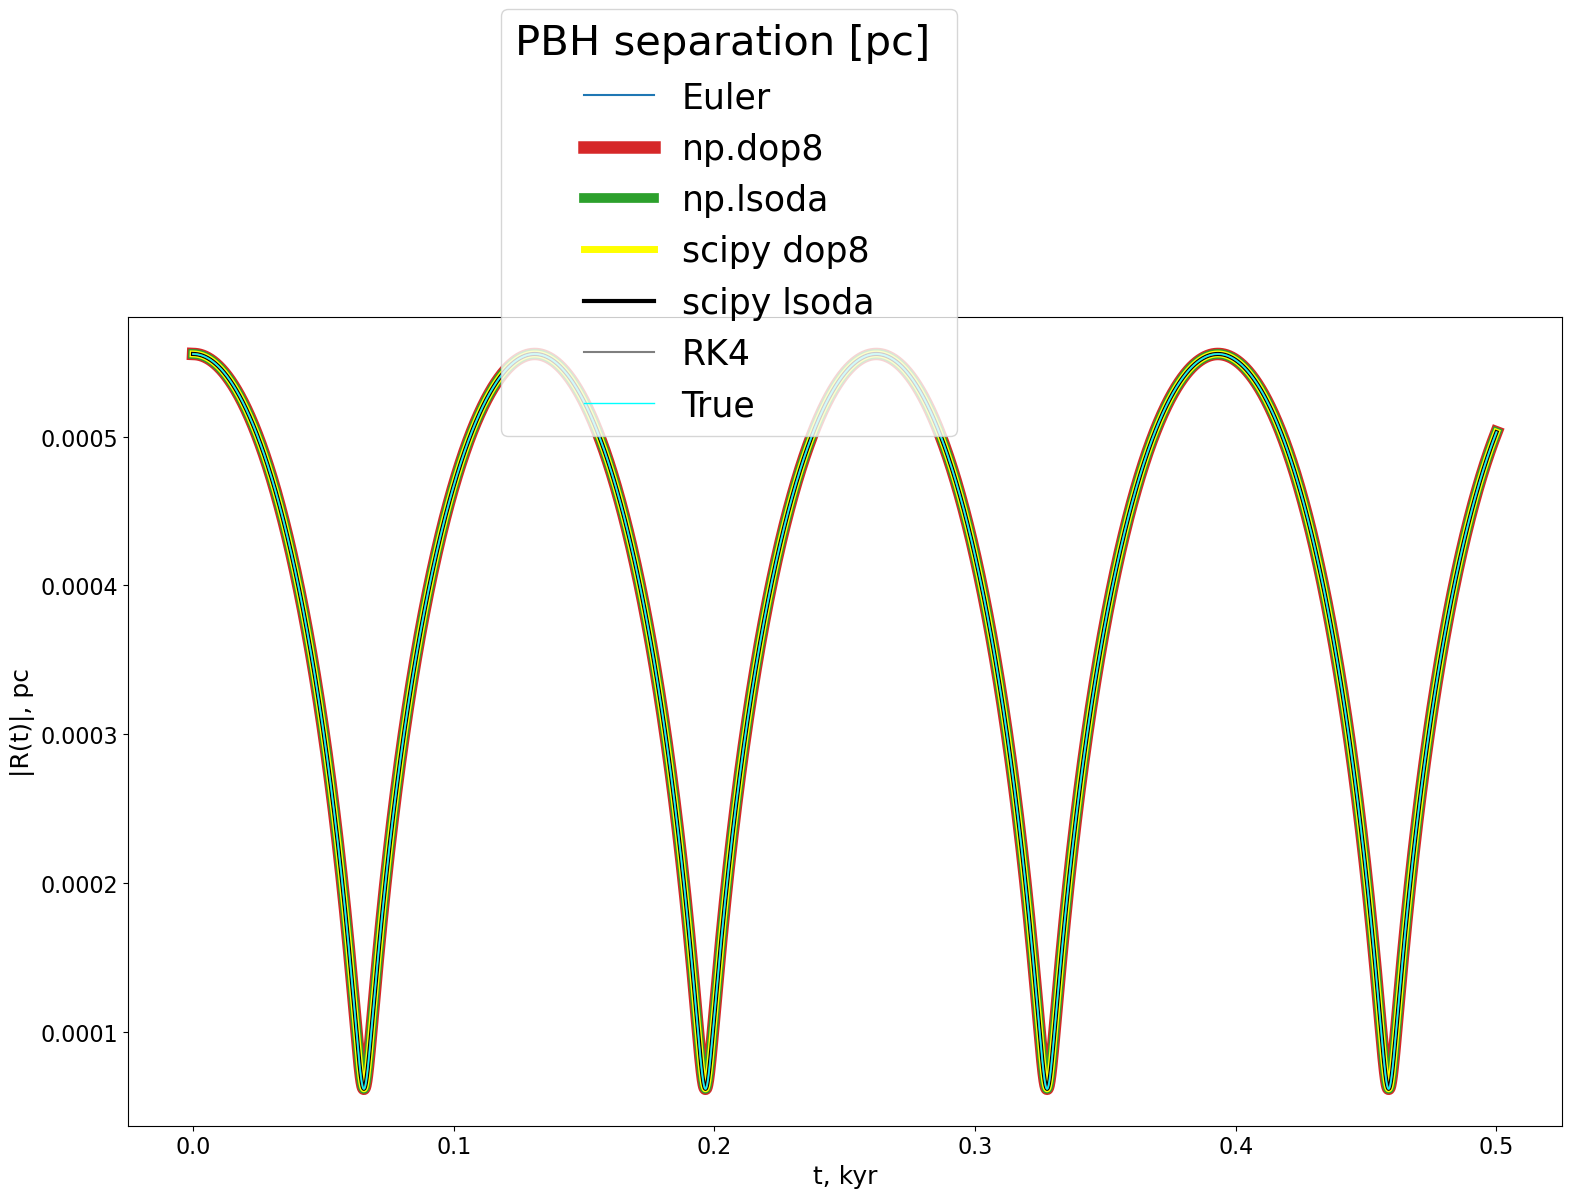

In [25]:
figL, axL = plt.subplots()

axL.plot(time_save1 * 10**(-10), Binary_separation_dist_t(pos_save_s, time_save1), color = "tab:blue", label = "Euler")
axL.plot(time_save3 * 10**(-10), Binary_separation_dist_t(usol2_p, time_save3), color = "tab:red", linewidth = 9, label = "np.dop8")
axL.plot(time_save4 * 10**(-10), Binary_separation_dist_t(usol_p, time_save4), color = "tab:green", linewidth = 7, label = "np.lsoda")
axL.plot(time_save6 * 10**(-10), Binary_separation_dist_t(pos_scd, time_save6), color = "yellow", linewidth = 5, label = "scipy dop8")
axL.plot(time_save5 * 10**(-10), Binary_separation_dist_t(pos_scl, time_save5), color = "black", linewidth = 3, label = "scipy lsoda")
axL.plot(time_save2 * 10**(-10), Binary_separation_dist_t(pos_save_rk, time_save2), color = "tab:gray", label = "RK4")
axL.plot(time_save6 * 10**(-10), sep_true (c, eccentricity, time_save6)/(3.086 * 10**13), color = "cyan", linewidth = 1, label = "True")

axL.set(xlabel = 't, kyr', ylabel = '|R(t)|, pc')
axL.xaxis.label.set_fontsize(18)
axL.yaxis.label.set_fontsize(18)
axL.tick_params(labelsize = 16)
figL.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axL in figL.axes:
    axLine, axLabel = axL.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figL.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=(0.45 , 0.75), title = 'PBH separation [pc] ', fontsize = 25, title_fontsize = 30)
           

#размер шрифта увеличить для значений осей
figL = axL.get_figure()
figL.savefig(f'../output/__run_{run_name}/separation.png')

plt.show()

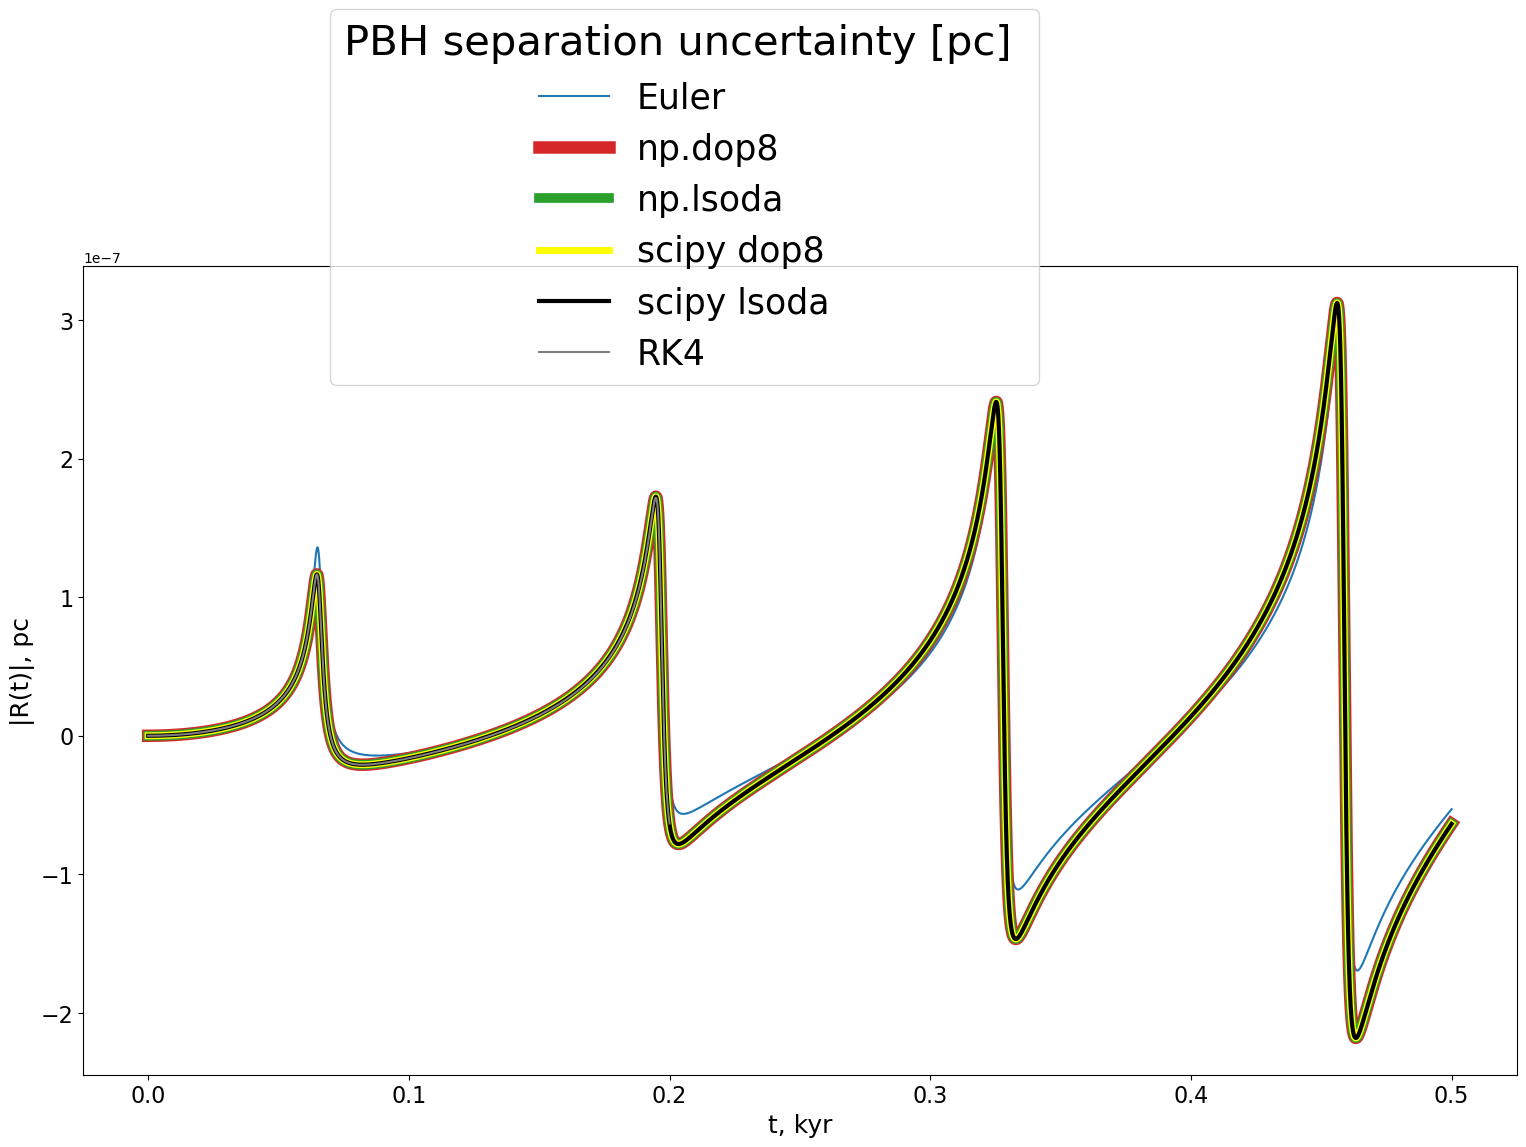

In [26]:
figL, axL = plt.subplots()

axL.plot(time_save1 * 10**(-10), Binary_separation_dist_t(pos_save_s, time_save1) - sep_true(c, eccentricity, time_save1)/(3.086*10**13), color = "tab:blue", label = "Euler")
axL.plot(time_save3 * 10**(-10), Binary_separation_dist_t(usol2_p, time_save3) - sep_true(c, eccentricity, time_save3)/(3.086*10**13), color = "tab:red", linewidth = 9, label = "np.dop8")
axL.plot(time_save4 * 10**(-10), Binary_separation_dist_t(usol_p, time_save4) - sep_true(c, eccentricity, time_save4)/(3.086*10**13), color = "tab:green", linewidth = 7, label = "np.lsoda")
axL.plot(time_save6 * 10**(-10), Binary_separation_dist_t(pos_scd, time_save6) - sep_true(c, eccentricity, time_save6)/(3.086*10**13), color = "yellow", linewidth = 5, label = "scipy dop8")
axL.plot(time_save5 * 10**(-10), Binary_separation_dist_t(pos_scl, time_save5) - sep_true(c, eccentricity, time_save5)/(3.086*10**13), color = "black", linewidth = 3, label = "scipy lsoda")
axL.plot(time_save2[:-3000] * 10**(-10), Binary_separation_dist_t(pos_save_rk[:-3000,:,:], time_save2[:-3000]) - sep_true(c, eccentricity, time_save2[:-3000])/(3.086*10**13), color = "tab:gray", label = "RK4")

axL.set(xlabel = 't, kyr', ylabel = '|R(t)|, pc')
axL.xaxis.label.set_fontsize(18)
axL.yaxis.label.set_fontsize(18)
axL.tick_params(labelsize = 16)
figL.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axL in figL.axes:
    axLine, axLabel = axL.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figL.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.45 , 0.75 ), title = 'PBH separation uncertainty [pc] ', fontsize = 25, title_fontsize = 30)
           

#размер шрифта увеличить для значений осей
figL = axL.get_figure()
figL.savefig(f'../output/__run_{run_name}/separation_uncertainty_plusE.png')

plt.show()

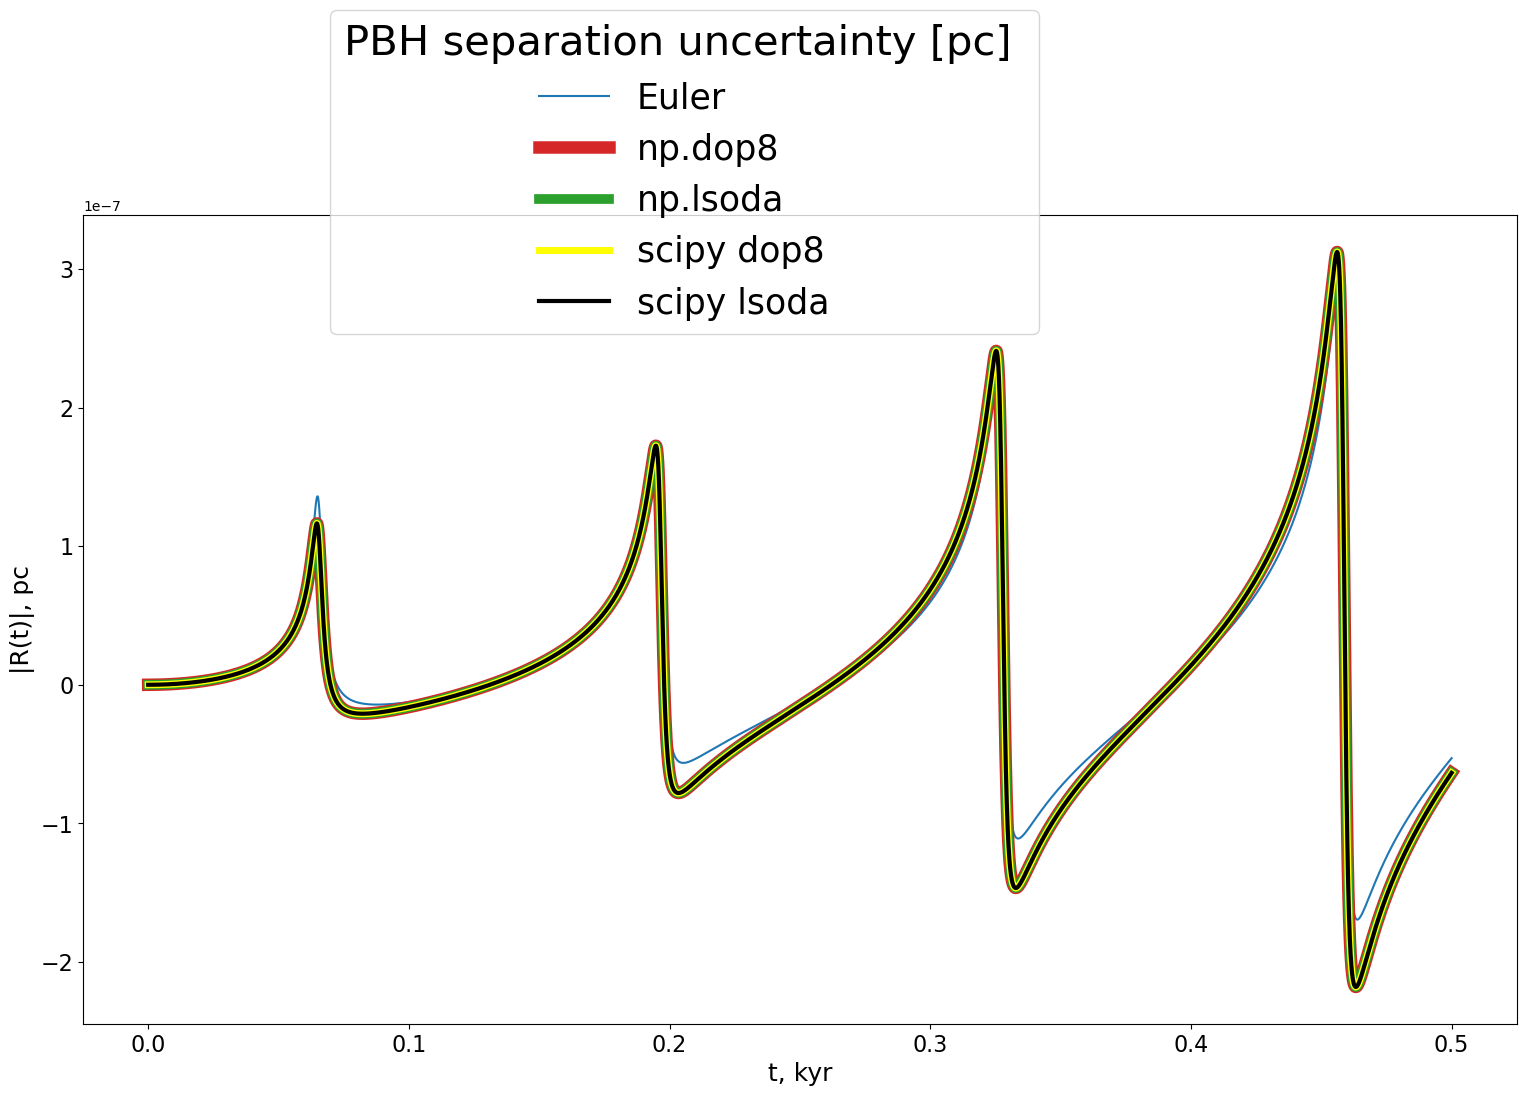

In [27]:
figL, axL = plt.subplots()

axL.plot(time_save1 * 10**(-10), Binary_separation_dist_t(pos_save_s, time_save1) - sep_true(c, eccentricity, time_save1)/(3.086*10**13), color = "tab:blue", label = "Euler")
axL.plot(time_save3 * 10**(-10), Binary_separation_dist_t(usol2_p, time_save3) - sep_true(c, eccentricity, time_save3)/(3.086*10**13), color = "tab:red", linewidth = 9, label = "np.dop8")
axL.plot(time_save4 * 10**(-10), Binary_separation_dist_t(usol_p, time_save4) - sep_true(c, eccentricity, time_save4)/(3.086*10**13), color = "tab:green", linewidth = 7, label = "np.lsoda")
axL.plot(time_save6 * 10**(-10), Binary_separation_dist_t(pos_scd, time_save6) - sep_true(c, eccentricity, time_save6)/(3.086*10**13), color = "yellow", linewidth = 5, label = "scipy dop8")
axL.plot(time_save5 * 10**(-10), Binary_separation_dist_t(pos_scl, time_save5) - sep_true(c, eccentricity, time_save5)/(3.086*10**13), color = "black", linewidth = 3, label = "scipy lsoda")
# axL.plot(time_save2 * 10**(-10), Binary_separation_dist_t(pos_save_rk, time_save2) - sep_true(c, eccentricity, time_save2)/(3.086*10**13), color = "tab:gray", label = "RK4")

axL.set(xlabel = 't, kyr', ylabel = '|R(t)|, pc')
axL.xaxis.label.set_fontsize(18)
axL.yaxis.label.set_fontsize(18)
axL.tick_params(labelsize = 16)
figL.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axL in figL.axes:
    axLine, axLabel = axL.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figL.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.45 , 0.75 ), title = 'PBH separation uncertainty [pc] ', fontsize = 25, title_fontsize = 30)
           

#размер шрифта увеличить для значений осей
figL = axL.get_figure()
figL.savefig(f'../output/__run_{run_name}/separation_uncertainty.png')

plt.show()

# Energy (t)

In [28]:
from pygra.parallel_acc import getPE_numba
import numba as nb
from numba import njit, prange
@njit(nb.types.Tuple((nb.float64[:, :], nb.float64[:, :]))(
    nb.float64[:], nb.float64[:, :, :], nb.float64[:, :, :], nb.float64, nb.float64), parallel = True)
def get_PEnergy(mass : FloatArray, pos_t : FloatArray, vel_t : FloatArray, __G : np.float64, __softening : np.float64) -> tuple[FloatArray, FloatArray]:
    N,n,k = pos_t.shape
    kinetinc_En : FloatArray =  np.empty((N, n), dtype = np.float64)
    potential_En : FloatArray =  np.empty((N, n), dtype = np.float64)
    for i in prange(N):
        potential_En[i, :] = - getPE_numba(pos_t[i,:,:], mass, __G, __softening)
        kinetinc_En[i, :] = 0.5 * mass * np.sum(vel_t[i, :, :] * vel_t[i, :, :], axis = 1)
    return kinetinc_En, potential_En

KE, PE = get_PEnergy(mass.flatten(), usol2_p, usol2_v, G, softening)

In [29]:
KE.shape, PE.shape

((5001, 2), (5001, 2))

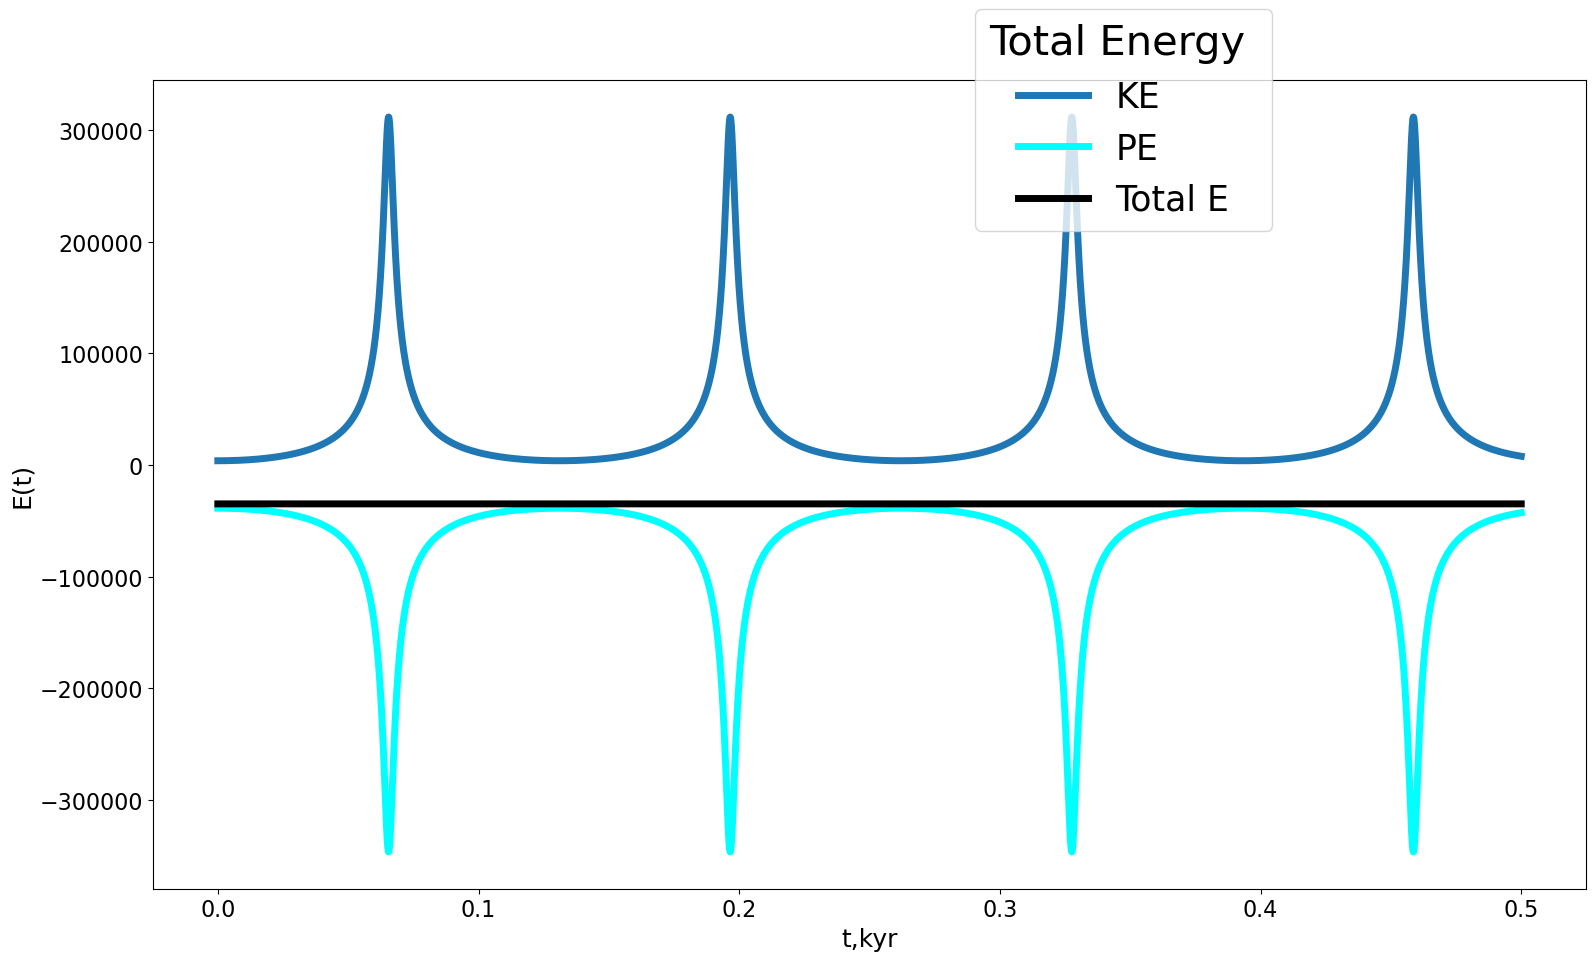

In [30]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

# for ittt in trange(2):
#     axE.plot(time_save3, KE[:, ittt], color = "red")#,markevery=100
#     axE.plot(time_save3, PE[:, ittt], color = "blue")#,markevery=100
axE.plot(time_save3 * 10**(-10), np.sum(KE[:, :], axis = 1), color = "tab:blue", linewidth = 5, label = "KE")#,markevery=100
axE.plot(time_save3 * 10**(-10), np.sum(0.5 * PE[:, :], axis = 1), color = "cyan", linewidth = 5, label = "PE")
axE.plot(time_save3 * 10**(-10), np.sum(KE[:, :] + 0.5 * PE[:, :], axis = 1), color = "black", linewidth = 5, label = "Total E")

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center',bbox_to_anchor=( 0.65 , 0.72 ),title = 'Total Energy ', fontsize=25,title_fontsize=30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_graf.png')

plt.show()

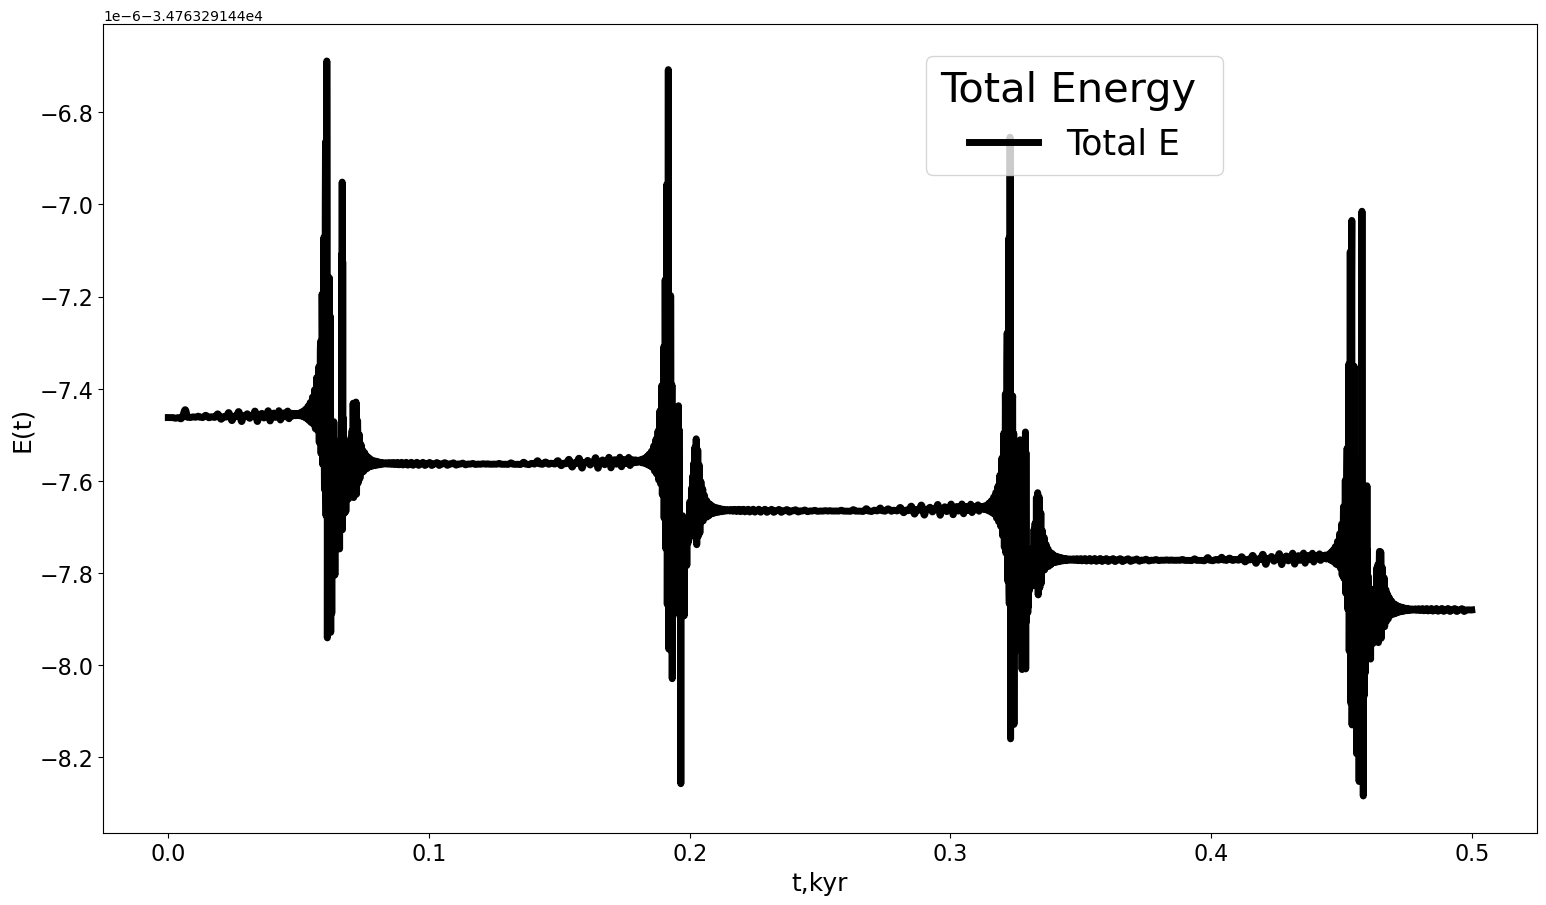

In [31]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

# for ittt in trange(100):
#     axE.plot(time_save3*10**(-10), KE[:, ittt], color = "red")#,markevery=100
#     axE.plot(time_save3*10**(-10), 0.5 * PE[:, ittt], color = "blue")#,markevery=100

# axE.plot(time_save3*10**(-10), 0.5 * PE[:, -1], color = "tab:green", label = 'Central BH PE')#,markevery=100
# axE.plot(time_save3*10**(-10), np.sum(KE[:, :], axis = 1), color = "tab:blue", linewidth = 5, label = "KE")#,markevery=100
# axE.plot(time_save3*10**(-10), KE[:, -1], color = "cyan", label = 'Central BH KE')#,markevery=100
# axE.plot(time_save3*10**(-10), 0.5 * np.sum(PE[:, :], axis = 1), color = "gray", linewidth = 5, label = "PE")
axE.plot(time_save2*10**(-10), np.sum(KE[:, :] + 0.5 * PE[:, :], axis = 1), color = "black", linewidth = 5, label = "Total E")

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.65 , 0.72 ), title = 'Total Energy ', fontsize = 25, title_fontsize = 30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_TOT_graf.png')

plt.show()

# Gif animation

In [32]:
# scale - is a scale for plot
# N_T=N_T/dN_T - is number of steps per dN_t - step len for pos save
# dN_T2 - step for plot's impages saving
def print_gif(pos_save, scale, N_T, dN_T2 = 100, run_name="0"): #N_T=N_T/dN_T
    for i in range(100):
        name = "../output/__run_"+run_name+"/Pic_t"
        try:
            os.makedirs(name)
            print("Directory created successfully! (path is " + name + ")")
            break
        except OSError as error:
            name = "../output/__run_" + str(i) + "/"
            if i == 99: print(f"Directory creation failed: {error}")
    figFF, ax1 = plt.subplots()
    ax1.grid(True)
    ax1.legend(prop = {'size': 15})
    ax1.set(title = '$Animation$', xlabel = '$x$', ylabel = '$y$')
    ax1.set_ylim(-scale, scale)
    ax1.set_xlim(-scale, scale)
    plt.ioff()
    pbar = tqdm(total = N_T/dN_T2)
    #line = ax1.scatter(pos_save[:-2,0,0],pos_save[:-2,1,0],s=5,color='tab:blue')
    line2 = ax1.scatter(pos_save[0, :, 0], pos_save[0, :, 1], s = 10, color = 'tab:red')

    for i in range(0, int(N_T), dN_T2):
        #line.set_offsets(np.vstack((pos_save[:-2,0,i+1],pos_save[:-2,1,i+1])).T)
        line2.set_offsets(np.vstack((pos_save[i+1, :, 0], pos_save[i+1, :, 1])).T)
        figFF = ax1.get_figure()
        figFF.savefig(f'../output/__run_{run_name}/Pic_t/saved_figure_' + str(i) + '.png')
        plt.close(figFF)
        plt.clf()
        pbar.update(1)
    pbar.close()    

    # Images list init
    frames = []
    from PIL import Image
    for frame_number in trange(0, int(N_T), dN_T2):
        # Open image for each moment
        frame = Image.open(f'../output/__run_{run_name}/Pic_t/saved_figure_{frame_number}.png')
        # add image to list of images.
        frames.append(frame)
        
    # Save all images with the first one
    frames[0].save(
        f'../output/__run_{run_name}/homer2.gif',
        save_all = True,
        append_images = frames[1:],  # Ignore first image
        optimize = True,
        duration = 1,
        loop = 0
    )
print_gif(usol2_p, 2 * dist, N, 100, run_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Directory created successfully! (path is ../output/__run_10/Pic_t)


100%|██████████| 50/50.0 [00:03<00:00, 16.28it/s]
100%|██████████| 50/50 [00:00<00:00, 808.58it/s]


<Figure size 640x480 with 0 Axes>

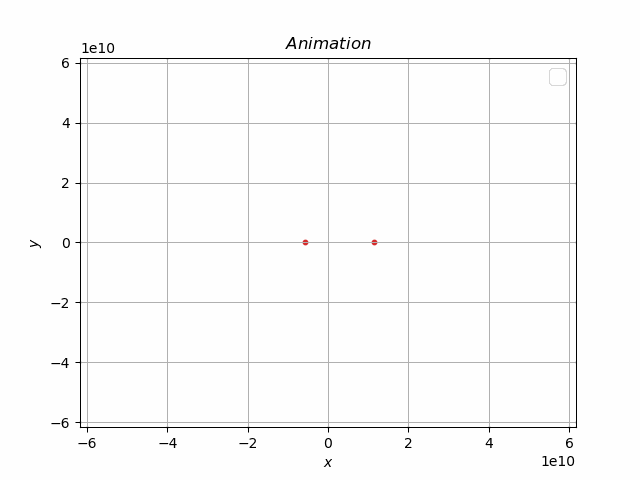

In [33]:
from IPython.display import Image
Image(f'../output/__run_{run_name}/homer2.gif')

In [34]:
# scale - is a scale for plot
# N_T=N_T/dN_T - is number of steps per dN_t - step len for pos save
# dN_T2 - step for plot's impages saving
def print_gif(pos_save, scale, N_T, dN_T2 = 100, run_name = "0"): #N_T=N_T/dN_T
    for i in range(100):
        name = "../output/__run_" + run_name + "/Pic_t"
        try:
            os.makedirs(name)
            print("Directory created successfully! (path is " + name + ")")
            break
        except OSError as error:
            name = "../output/__run_" + str(i) + "/"
            if i == 99: print(f"Directory creation failed: {error}")
    figFF, ax1 = plt.subplots()
    ax1.grid(True)
    ax1.legend(prop = {'size': 15})
    ax1.set(title = '$Animation$', xlabel = '$x$', ylabel = '$y$')
    ax1.set_ylim(-scale, scale)
    ax1.set_xlim(-scale, scale)
    plt.ioff()
    pbar = tqdm(total = N_T/dN_T2)
    #line = ax1.scatter(pos_save[:-2,0,0],pos_save[:-2,1,0],s=5,color='tab:blue')
    line2 = ax1.scatter(pos_save[:, :, 0], pos_save[:, :, 1], s = 10, color = 'tab:red')
    figFF = ax1.get_figure()
    figFF.savefig(f'../output/__run_{run_name}/saved_figure.png')
print_gif(usol2_p, 2 * dist, N, 100, run_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Directory creation failed: [Errno 17] File exists: '../output/__run_10/Pic_t'


  0%|          | 0/50.0 [00:00<?, ?it/s]

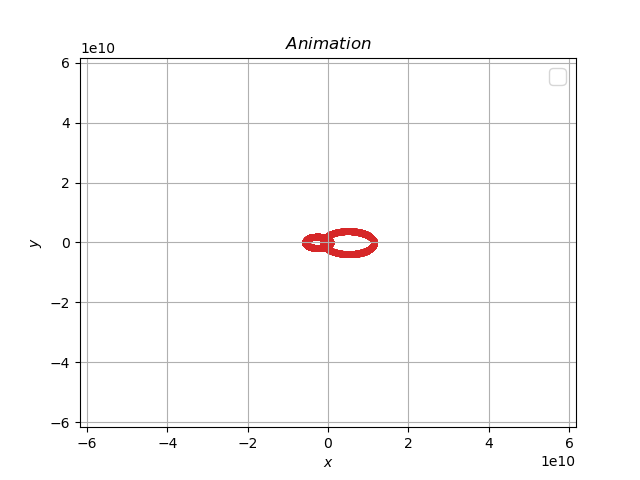

In [35]:
from IPython.display import Image
Image(f'../output/__run_{run_name}/saved_figure.png')